# Building an MLP with different kernels

We are going to use the circular dataset we used in the TensorFlow playground and see what the effect of different kernels is on the outcome of the neural network.

## Dataset - circles

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_circles, make_checkerboard
import matplotlib.pyplot as plt

# scikit-learn offers a method to create a similar dataset
X, y = make_circles(n_samples=1000, noise=0.05)

df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}

print(df.head())

          x         y  label
0  0.752283  0.362403      1
1 -0.847564 -0.141613      1
2 -0.894391 -0.253585      0
3 -0.640343  0.442921      1
4  0.080163  0.790360      1


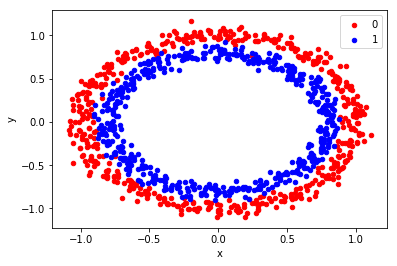

In [2]:
# Plotting the dataset
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

We create a training and test set:

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Linear kernel

Now, we create a neural network with two hidden layers, and a linear kernel. Notice that we also run the algorithm 10 times/epochs:

In [9]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam

input_dim = X_train.shape[1]
output_dim = 1

model = Sequential()

# Add the input layer and connect to 50 hidden neurons
model.add(Dense(50,input_dim=input_dim))
# See the activation type of the layer
model.add(Activation('linear'))

# Extra hidden layer can be added like this
model.add(Dense(50))
model.add(Activation('linear'))

# Connect the previous layer to the output layer
model.add(Dense(output_dim))

# Add a final layer for classification based on the sigmoid function
model.add(Activation('sigmoid'))

# We use a different optimiser here instead of stochastic gradient descent
# This is not important now
model.compile(optimizer=Adam(),loss='binary_crossentropy',metrics=['accuracy'])
model.summary()
model.fit(X_train,y_train,epochs=10)
prediction_class = model.predict_classes(X_test)
prediction_prob = model.predict_proba(X_test)

print('Accuracy:', accuracy_score(y_test,prediction_class))
print('AUC:',roc_auc_score(y_test,prediction_prob))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 50)                150       
_________________________________________________________________
activation_16 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 50)                2550      
_________________________________________________________________
activation_17 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 51        
_________________________________________________________________
activation_18 (Activation)   (None, 1)                 0         
Total params: 2,751
Trainable params: 2,751
Non-trainable params: 0
_________________________________________________________________
Epoch 1/

Clearly, the network is having a hard time coming up with good results. The linear kernel will just not be able to capture the shapes in the data adequately. Let's try a different kernel.

## ReLU kernel

We can easily change the code above to use a different kernel, e.g., the rectified linear unit:

In [10]:
input_dim = X_train.shape[1]
output_dim = 1

model = Sequential()
model.add(Dense(50,input_dim=input_dim))
model.add(Activation('relu'))

model.add(Dense(50))
model.add(Activation('relu'))

model.add(Dense(output_dim))

model.add(Activation('sigmoid'))

model.compile(optimizer=Adam(),loss='binary_crossentropy',metrics=['accuracy'])
model.summary()
model.fit(X_train,y_train,epochs=10)
prediction_class = model.predict_classes(X_test)
prediction_prob = model.predict_proba(X_test)

print('Accuracy:', accuracy_score(y_test,prediction_class))
print('AUC:',roc_auc_score(y_test,prediction_prob))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 50)                150       
_________________________________________________________________
activation_19 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 50)                2550      
_________________________________________________________________
activation_20 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 51        
_________________________________________________________________
activation_21 (Activation)   (None, 1)                 0         
Total params: 2,751
Trainable params: 2,751
Non-trainable params: 0
_________________________________________________________________
Epoch 1/

That's not a bad result. You will notice that, when running the model multiple times, the result is not very stable. Nevertheless, the ReLU kernel will at least be able to break that 50% accuracy barrier that the linear kernel had because it can't predict the outcome and ends up in random guessing (or just drawing a straight line through the middle - which is the same in the case of the circles).